Coral server (https://github.com/robmarkcole/coral-pi-rest-server) running on [192.168.1.107:5000](192.168.1.107:5000)

In [1]:
# import the necessary packages
import requests
from PIL import Image
from PIL import ImageDraw
%matplotlib inline
from helpers import *

CONFIDENCE = 25 # the threshold we set for confident predictions

from IPython.display import display # to display images

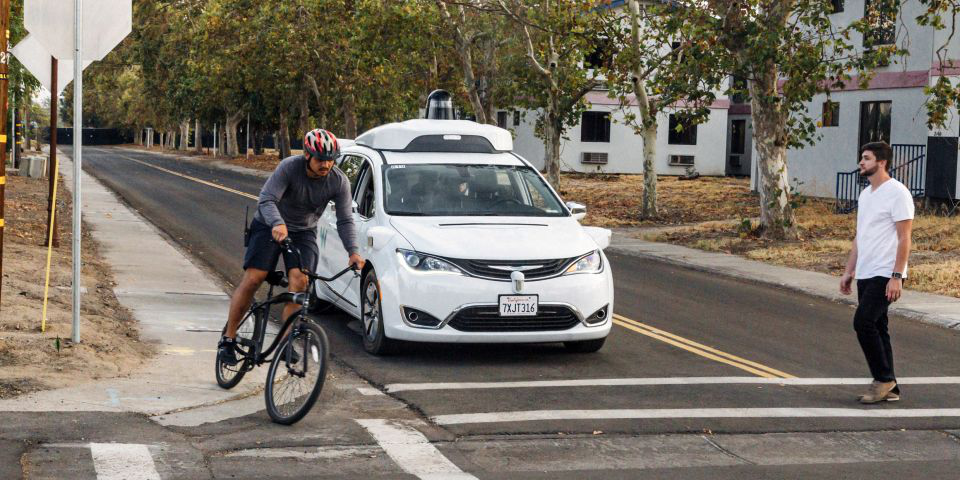

In [2]:
# image_file = "face.jpg" # Returns boxes around random parts of the image
image_file = "people_car.jpg" # returns zero predictions
image = Image.open(image_file)  # PIL img object.
display(image)

In [3]:
image.size

(960, 480)

In [4]:
image_width = image.size[0]
image_width

960

In [5]:
image_height = image.size[1]
image_height

480

Use CURL to make a prediction

In [6]:
!curl -X POST -F image=@people_car.jpg 'http://192.168.1.107:5000/predict'

{"predictions":[{"bounding_box":{"x1":0.87,"x2":0.28,"y1":0.96,"y2":0.85},"confidence":"95.31","label":"person"},{"bounding_box":{"x1":0.32,"x2":0.24,"y1":0.64,"y2":0.75},"confidence":"91.02","label":"car"},{"bounding_box":{"x1":0.24,"x2":0.3,"y1":0.37,"y2":0.78},"confidence":"58.2","label":"person"},{"bounding_box":{"x1":0.22,"x2":0.44,"y1":0.36,"y2":0.87},"confidence":"26.95","label":"bicycle"},{"bounding_box":{"x1":0.44,"x2":0.36,"y1":0.47,"y2":0.44},"confidence":"21.09","label":"person"},{"bounding_box":{"x1":0.37,"x2":0.34,"y1":0.41,"y2":0.43},"confidence":"21.09","label":"person"},{"bounding_box":{"x1":0.32,"x2":0.31,"y1":0.36,"y2":0.44},"confidence":"21.09","label":"person"},{"bounding_box":{"x1":0.01,"x2":0.02,"y1":0.02,"y2":0.09},"confidence":"21.09","label":"traffic light"},{"bounding_box":{"x1":0.25,"x2":0.54,"y1":0.34,"y2":0.85},"confidence":"16.02","label":"bicycle"},{"bounding_box":{"x1":0.31,"x2":0.32,"y1":0.37,"y2":0.62},"confidence":"16.02","label":"person"}],"success"

Using requests

In [7]:
CORAL_REST_API_URL = "http://192.168.1.107:5000/predict"
payload = {"image": open(image_file, "rb").read()}
SUCCESS = 200
SERVER_ERROR = 500

# submit the request
response = requests.post(CORAL_REST_API_URL, files=payload)
response.status_code

200

In [8]:
# ensure the request was successful
if response.status_code == SUCCESS:
    predictions = response.json()['predictions']
    
    # loop over the predictions and display them
    for result in predictions:
        print("{}: {}: {}".format(result["label"], result["confidence"], result["bounding_box"]))

person: 95.31: {'x1': 0.87, 'x2': 0.28, 'y1': 0.96, 'y2': 0.85}
car: 91.02: {'x1': 0.32, 'x2': 0.24, 'y1': 0.64, 'y2': 0.75}
person: 58.2: {'x1': 0.24, 'x2': 0.3, 'y1': 0.37, 'y2': 0.78}
bicycle: 26.95: {'x1': 0.22, 'x2': 0.44, 'y1': 0.36, 'y2': 0.87}
person: 21.09: {'x1': 0.44, 'x2': 0.36, 'y1': 0.47, 'y2': 0.44}
person: 21.09: {'x1': 0.37, 'x2': 0.34, 'y1': 0.41, 'y2': 0.43}
person: 21.09: {'x1': 0.32, 'x2': 0.31, 'y1': 0.36, 'y2': 0.44}
traffic light: 21.09: {'x1': 0.01, 'x2': 0.02, 'y1': 0.02, 'y2': 0.09}
bicycle: 16.02: {'x1': 0.25, 'x2': 0.54, 'y1': 0.34, 'y2': 0.85}
person: 16.02: {'x1': 0.31, 'x2': 0.32, 'y1': 0.37, 'y2': 0.62}


Clearly we need to filter the low confidence predictions

# Get summary info
Funcions in `helpers.py`

In [9]:
get_object_classes(predictions, CONFIDENCE)

{'bicycle', 'car', 'person'}

In [10]:
get_object_instances(predictions, 'person', CONFIDENCE)

2

In [11]:
get_objects_summary(predictions, CONFIDENCE)

{'car': 1, 'bicycle': 1, 'person': 2}

## Draw bounging boxes - to fix

In [ ]:
draw = ImageDraw.Draw(image)

In [ ]:
help(draw.rectangle)

In [ ]:
for result in predictions:
    b_box = result["bounding_box"]
    print (result["label"], b_box)
    bounding_box = [(b_box['x1']*image_width, b_box['y1']*image_height), (b_box['x2']*image_width, b_box['y2']*image_height)]
    # box = bounding_box.flatten().tolist()
    draw.rectangle(bounding_box, outline='red')

In [ ]:
display(image)

Need to fix